In [1]:
# Extract data from unedited file (more than 1 file) *********************************
import numpy as np

# Cape Darnley 1993 
cd93 = open('Cape Darnley/1993-Feb-DISCOVERY-579m.csv', 'r')
data_cd93 = np.genfromtxt(cd93, delimiter=',', skip_header=20, skip_footer=1, usecols=(0,2,4,6))
cd93.close()

# Cape Darnley 1996
cd96 = open('Cape Darnley/1996-Jun-NATHANIEL-B-PALMER-617m.csv', 'r')
data_cd96 = np.genfromtxt(cd96, delimiter=',', skip_header=20, skip_footer=1, usecols=(0,2,4,6))
cd96.close()

# Cape Darnley 2006
cd06 = open('Cape Darnley/2006-Feb-AURORA-AUSTRALIS-96m.csv', 'r')
data_cd06 = np.genfromtxt(cd06, delimiter=',', skip_header=14, skip_footer=1, usecols=(0,2,4,6,8))
cd06.close()


# Cape Darnley 2018
cd18 = open('Cape Darnley/2018-Dec-KAIYO-MARU-673m.csv', 'r')
data_cd18 = np.genfromtxt(cd18, delimiter=',', skip_header=69, skip_footer=1, usecols=(0,2,4,6,12))
cd18.close()

In [2]:
# Notebook setup
import xarray as xr
import pandas as pd
import numpy as np
#!pip install netcdf4
#!pip install seawater
import seawater
import gsw

import matplotlib.pyplot as plt

In [3]:
# Create variables with user-friendly names
depth_cd93 = data_cd93[:,0]
temp_cd93  = data_cd93[:,1]
salt_cd93  = data_cd93[:,2]
oxy_cd93   = data_cd93[:,3]

depth_cd96 = data_cd96[:,0]
temp_cd96  = data_cd96[:,1]
salt_cd96  = data_cd96[:,2]
oxy_cd96   = data_cd96[:,3]


depth_cd06 = data_cd06[:,0]
temp_cd06  = data_cd06[:,1]
salt_cd06  = data_cd06[:,2]
oxy_cd06   = data_cd06[:,3]
fluo_cd06  = data_cd06[:,4]

depth_cd18 = data_cd18[:,0]
temp_cd18  = data_cd18[:,1]
salt_cd18  = data_cd18[:,2]
oxy_cd18   = data_cd18[:,3]
fluo_cd18  = data_cd18[:,4]

del(data_cd93) # delete "data"... to keep things clean
del(data_cd96) # delete "data"... to keep things clean
del(data_cd06) # delete "data"... to keep things clean
del(data_cd18) # delete "data"... to keep things clean

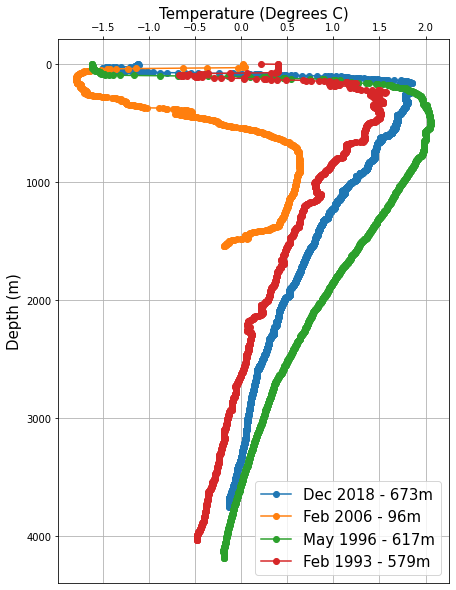

In [5]:
# Plot temperature data ***********************************************
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(7,10))
ax1 = fig1.add_subplot(111)
ax1.plot(temp_cd18, depth_cd18,'o-', label='Dec 2018 - 673m')
ax1.plot(temp_cd06, depth_cd06,'o-', label='Feb 2006 - 96m')
ax1.plot(temp_cd96, depth_cd96,'o-', label='May 1996 - 617m')
ax1.plot(temp_cd93, depth_cd93,'o-', label='Feb 1993 - 579m')
plt.legend(loc='lower right', fontsize=15);
 
# Draw x label
ax1.set_xlabel('Temperature (Degrees C)', fontsize=15)
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax1.xaxis.tick_top() # ANOTHER way to move the ticks to the top
 
# Draw y label
ax1.set_ylabel('Depth (m)', fontsize=15)
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)

ax1.grid()

plt.savefig("Temp Depth CD.jpg") #save as jpg
plt.savefig("Temp Depth CD.png") #save as png

plt.show()

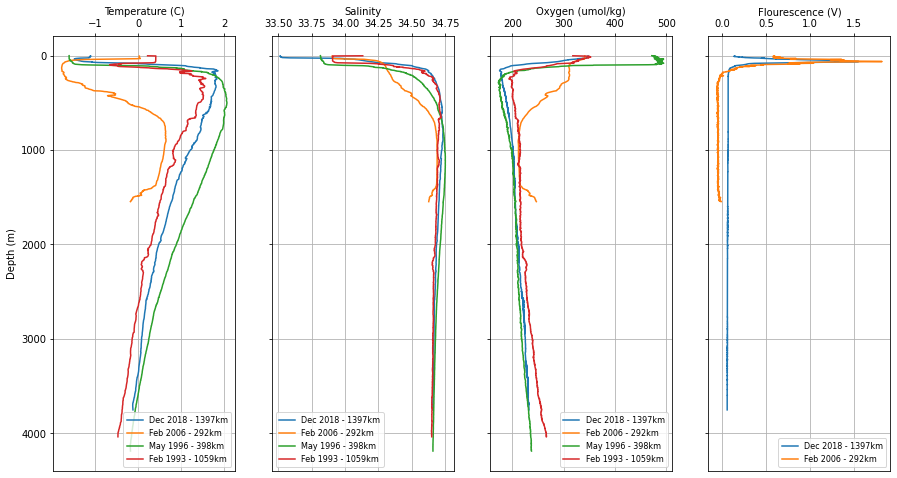

In [4]:
# Four-panel plot
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(15,8))
# Temperature
ax2.plot(temp_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax2.plot(temp_cd06, depth_cd06,'-',  label='Feb 2006 - 292km')
ax2.plot(temp_cd96, depth_cd96,'-',label='May 1996 - 398km')
ax2.plot(temp_cd93, depth_cd93,'-', label='Feb 1993 - 1059km')
ax2.legend(loc='lower right', fontsize=8);
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid()


# Salinity
ax3.plot(salt_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax3.plot(salt_cd06, depth_cd06,'-', label='Feb 2006 - 292km')
ax3.plot(salt_cd96, depth_cd96,'-', label='May 1996 - 398km')
ax3.plot(salt_cd93, depth_cd93,'-', label='Feb 1993 - 1059km')
ax3.legend(loc='lower left', fontsize=8);
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid()


# Oxygen
ax4.plot(oxy_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax4.plot(oxy_cd06, depth_cd06,'-', label='Feb 2006 - 292km')
ax4.plot(oxy_cd96, depth_cd96,'-', label='May 1996 - 398km')
ax4.plot(oxy_cd93, depth_cd93,'-', label='Feb 1993 - 1059km')
ax4.legend(loc='lower right', fontsize=8);
ax4.set_xlabel('Oxygen (umol/kg)')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid()


# Fluorescence
ax5.plot(fluo_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax5.plot(fluo_cd06, depth_cd06,'-', label='Feb 2006 - 292km')
ax5.legend(loc='lower right', fontsize=8);
ax5.set_xlabel('Flourescence (V)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid()



plt.savefig("Temp_Salt_oxy_Fl_CD.jpg") #save as jpg
plt.savefig("Temp_Salt_oxy_Fl_CD.png") #save as png

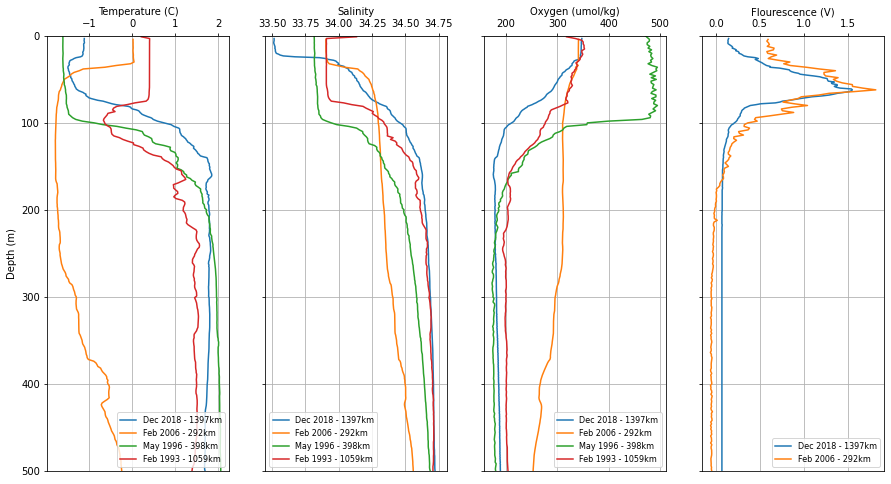

In [5]:
# Four-panel plot
fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(15,8))
# Temperature
ax2.plot(temp_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax2.plot(temp_cd06, depth_cd06,'-',  label='Feb 2006 - 292km')
ax2.plot(temp_cd96, depth_cd96,'-',label='May 1996 - 398km')
ax2.plot(temp_cd93, depth_cd93,'-', label='Feb 1993 - 1059km')
ax2.legend(loc='lower right', fontsize=8);
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(0,500)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid()


# Salinity
ax3.plot(salt_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax3.plot(salt_cd06, depth_cd06,'-', label='Feb 2006 - 292km')
ax3.plot(salt_cd96, depth_cd96,'-', label='May 1996 - 398km')
ax3.plot(salt_cd93, depth_cd93,'-', label='Feb 1993 - 1059km')
ax3.legend(loc='lower left', fontsize=8);
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid()


# Oxygen
ax4.plot(oxy_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax4.plot(oxy_cd06, depth_cd06,'-', label='Feb 2006 - 292km')
ax4.plot(oxy_cd96, depth_cd96,'-', label='May 1996 - 398km')
ax4.plot(oxy_cd93, depth_cd93,'-', label='Feb 1993 - 1059km')
ax4.legend(loc='lower right', fontsize=8);
ax4.set_xlabel('Oxygen (umol/kg)')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid()


# Fluorescence
ax5.plot(fluo_cd18, depth_cd18,'-', label='Dec 2018 - 1397km')
ax5.plot(fluo_cd06, depth_cd06,'-', label='Feb 2006 - 292km')
ax5.legend(loc='lower right', fontsize=8);
ax5.set_xlabel('Flourescence (V)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid()



plt.savefig("Temp_Salt_oxy_Fl_CD_zoomed.jpg") #save as jpg
plt.savefig("Temp_Salt_oxy_Fl_CD_zoomed.png") #save as png

In [7]:
#load dataset
data=pd.read_csv('Cape Darnley/Combined_Cape_Darnley_Data.csv')
ts=data[['temp', 'salt', 'depth', 'year']]
df=ts.sort_values('temp',ascending=True)
df['dens']=seawater.eos80.pden(df['salt'],df['temp'],df['depth'],pr=0)

#find min & max values for temp & salinity
mint=np.min(df['temp'])
maxt=np.max(df['temp'])

mins=np.min(df['salt'])
maxs=np.max(df['salt'])

In [8]:
#calculate seawater density from temp & salinity
#may need to change the hard coded number at end to however many data points you have
tempL=np.linspace(mint-1,maxt+1,285)
salL=np.linspace(mins-1,maxs+1,285)

Tg, Sg = np.meshgrid(tempL,salL)
#sigma_theta = gsw.sigma0(Sg, Tg)
#sigma_theta = seawater.eos80.pden(Sg, Tg, 0)
#may need to change the hard coded number at end to however many data points you have
#cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),285)

AttributeError: 'Line2D' object has no property 'colors'

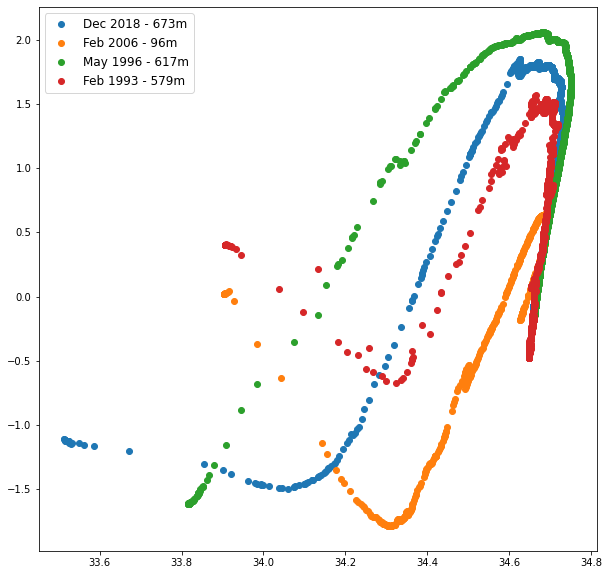

In [12]:
# TS plot

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(-2, 3, .2)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

#freezing point
FP0=seawater.eos80.fp(x, 0)
FP0=seawater.eos80.fp(x, 0)


fig6 = plt.figure(figsize=(10,10))
ax6 = fig6.add_subplot(111)
ax6.plot(salt_cd18, temp_cd18,'o', label='Dec 2018 - 673m')
ax6.plot(salt_cd06, temp_cd06,'o', label='Feb 2006 - 96m')
ax6.plot(salt_cd96, temp_cd96,'o', label='May 1996 - 617m')
ax6.plot(salt_cd93, temp_cd93,'o', label='Feb 1993 - 579m')
ax6.legend(loc='upper left', fontsize=12);


# Plot the contour lines
#CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.2))
#plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')
ax6.plot(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.2))
    
# Draw x label
ax6.set_xlabel('Salinity')
 
# Draw y label
ax6.set_ylabel('Tepmerature (Degrees C)')

ax6.grid()
 
plt.savefig("TS CD.jpg") #save as jpg
plt.savefig("TS CD.png") #save as png

plt.show()